In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
import numpy as np
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

np.random.seed(3)

(X_train, Y_train), (X_test1, Y_test1) = cifar100.load_data()


In [2]:
X_val = X_train[40000:]
Y_val = Y_train[40000:]
X_train = X_train[:40000]
Y_train = Y_train[:40000]

X_train = X_train.reshape(40000, 32,32,3).astype('float32') / 255.0
X_val = X_val.reshape(10000, 32,32,3).astype('float32') / 255.0
X_test = X_test1.reshape(10000, 32,32,3).astype('float32') / 255.0


In [3]:
train_rand_idxs = np.random.choice(40000, 6000)
val_rand_idxs = np.random.choice(10000, 1000)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test1)



In [4]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(164, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.summary()

hist = model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data=(X_val, Y_val))

print('Mean Accuracy: ',np.mean(hist.history['acc']))
print('Mean Loss: ',np.mean(hist.history['loss']))
print('Mean Val Accuracy: ',np.mean(hist.history['val_acc']))
print('Mean Val Loss: ',np.mean(hist.history['val_loss']))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
____

10000/10000 [==============================] - 9s 895us/sample - loss: 3.9414 - acc: 0.0877
Test loss: 3.9414473469257354
Test accuracy: 0.0877


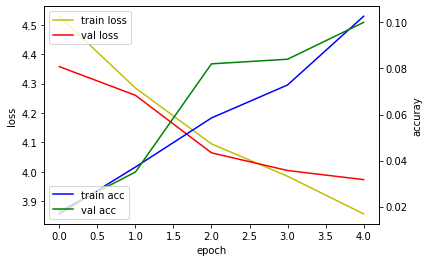

In [8]:
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size=10)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [9]:
(OX_train, OY_train), (OX_test, OY_test) = cifar10.load_data()

In [10]:
OX_test_reshape = OX_test.reshape(10000,32,32,3).astype('float32') / 255.0

Opredictions = model.predict(OX_test_reshape)

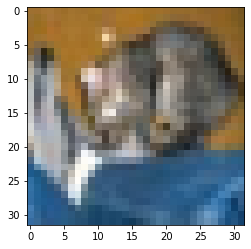

Actual:  [3]
Predicted:  2


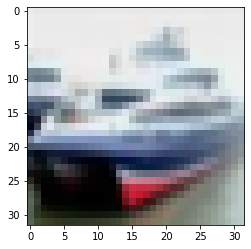

Actual:  [8]
Predicted:  41


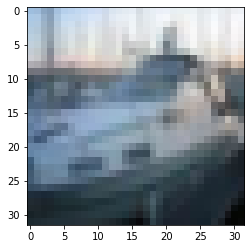

Actual:  [8]
Predicted:  23


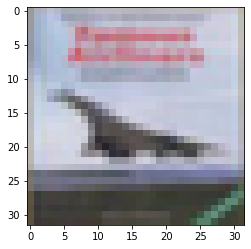

Actual:  [0]
Predicted:  41


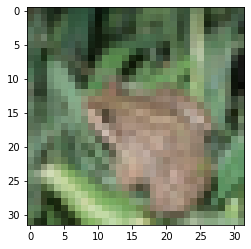

Actual:  [6]
Predicted:  88


In [11]:
for i in range(5):
    plt.imshow(OX_test[i])
    plt.show()
    print("Actual: ",OY_test[i])
    print("Predicted: ",np.argmax(Opredictions[i]))

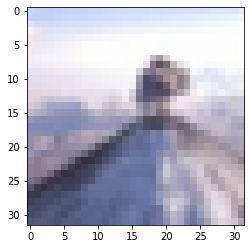

Actual:  49
Predicted:  23


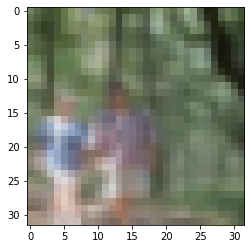

Actual:  33
Predicted:  97


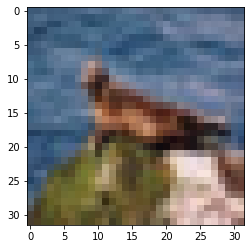

Actual:  72
Predicted:  24


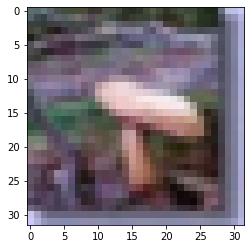

Actual:  51
Predicted:  54


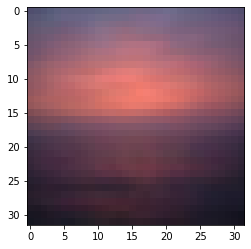

Actual:  71
Predicted:  36


In [12]:
Xpredictions = model.predict(X_test)

for i in range(5):
    plt.imshow(X_test1[i])
    plt.show()
    print("Actual: ",np.argmax(Y_test[i]))
    print("Predicted: ",np.argmax(Xpredictions[i]))